In [2]:
from collections import defaultdict

import time
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset

In [3]:
#Prepare dataset for retraining of BERT

import csv
import string
file = open('./train_text_goodscores2.tsv', 'w+', newline ='')
df_train = pd.read_csv("./train.tsv", delimiter="\t", header=None, index_col=False)

df = []
for j in range(len(df_train[1])):
  if float(df_train[1][j]) > 0.6:
    t1 = df_train[0][j]
    # print(t1)
    t2 = t1.lower()
    df.append(t2)
    file.write(t2 + "\n")

file.close()
len(df)

6821

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [5]:
CUDA_VISIBLE_DEVICES=0

In [6]:
!pip install transformers
import transformers
from transformers import BertModel, BertForMaskedLM, BertTokenizer, AdamW, get_linear_schedule_with_warmup


In [7]:
PRE_TRAINED_MODEL_NAME = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)
bert_model = BertForMaskedLM.from_pretrained(PRE_TRAINED_MODEL_NAME, return_dict=False)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [8]:
from transformers import LineByLineTextDataset

dataset = LineByLineTextDataset(
    tokenizer=tokenizer,
    file_path="./train_text_goodscores2.tsv",
    block_size=32
)

/usr/local/lib/python3.7/dist-packages/transformers/data/datasets/language_modeling.py:125: FutureWarning: This dataset will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/master/examples/pytorch/language-modeling/run_mlm.py
  FutureWarning,


In [9]:
from transformers import DataCollatorForLanguageModeling

data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer, mlm=True, mlm_probability=0.15
)

In [10]:
from transformers import Trainer, TrainingArguments

training_args = TrainingArguments(
    output_dir="./bert_base_uncased",
    overwrite_output_dir=True,
    num_train_epochs=5,
    per_device_train_batch_size=32,
    save_steps=500,
    save_total_limit=2,
    seed=1
)

trainer = Trainer(
    model=bert_model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=dataset
)



In [11]:
dataset[0], len(dataset)

({'input_ids': tensor([ 101, 2029, 2433, 1997, 2231, 2003, 2145, 1999, 2173, 1999, 5483, 1029,
           102])}, 6821)

In [12]:
trainer.train()

trainer.save_model("./bert_base_uncased")

***** Running training *****
  Num examples = 6821
  Num Epochs = 5
  Instantaneous batch size per device = 32
  Total train batch size (w. parallel, distributed & accumulation) = 32
  Gradient Accumulation steps = 1
  Total optimization steps = 1070


Step,Training Loss
500,2.295300
1000,1.921900


Saving model checkpoint to ./bert_base_uncased/checkpoint-500
Configuration saved in ./bert_base_uncased/checkpoint-500/config.json
Model weights saved in ./bert_base_uncased/checkpoint-500/pytorch_model.bin
Saving model checkpoint to ./bert_base_uncased/checkpoint-1000
Configuration saved in ./bert_base_uncased/checkpoint-1000/config.json
Model weights saved in ./bert_base_uncased/checkpoint-1000/pytorch_model.bin


Training completed. Do not forget to share your model on huggingface.co/models =)


Saving model checkpoint to ./bert_base_uncased
Configuration saved in ./bert_base_uncased/config.json
Model weights saved in ./bert_base_uncased/pytorch_model.bin


In [13]:
# from transformers import pipeline

# fill_mask = pipeline(
#     "fill-mask",
#     model=bert_model,
#     tokenizer=tokenizer
# )
# fill_mask("What are the religious [MASK] of the afterlife within Judaism ?")



In [14]:
# print(data['input_ids'].shape)
# print(data['attention_mask'].shape)
# print(data['label'].shape)

In [15]:
# %reload_ext tensorboard

# %tensorboard --logdir ./bert_base_uncased/runs

In [16]:
trainer.save_model("./bert_base_uncased")


Saving model checkpoint to /content/drive/My Drive/IREAssign3/bert_base_uncased
Configuration saved in /content/drive/My Drive/IREAssign3/bert_base_uncased/config.json
Model weights saved in /content/drive/My Drive/IREAssign3/bert_base_uncased/pytorch_model.bin


In [17]:
MAX_LEN = 32
BATCH_SIZE = 32
EPOCHS = 2
mylearn_rate = 2e-5
NUM_CLASSES = 6

In [18]:
bert_model = BertModel.from_pretrained("./bert_base_uncased")


loading configuration file /content/drive/My Drive/IREAssign3/bert_base_uncased/config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "return_dict": false,
  "torch_dtype": "float32",
  "transformers_version": "4.12.3",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading weights file /content/drive/My Drive/IREAssign3/bert_base_uncased/pytorch_model.bin
Some weights of the model checkpoint at /content/drive/My Drive/IREAssign3/bert_base_uncased were not u

In [19]:
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)
torch.backends.cudnn.deterministic = True

In [20]:
df_train = pd.read_csv("./train.tsv", delimiter="\t", header=None, index_col=False)
df_train["queries"] = df_train[0]
df_train["labels"] = df_train[1]

df_train = df_train.drop(columns=[0])
df_train = df_train.drop(columns=[1])

df_train.head()

,queries,labels
0,The European Union includes how many ?,0.2
1,What are Mia Hamms accomplishment ?,0.4
2,Which form of government is still in place in ...,1.0
3,When was the canal de panama built ?,0.8
4,What color is the black box on commercial aero...,0.6


In [21]:
df_train.shape

(17500, 2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


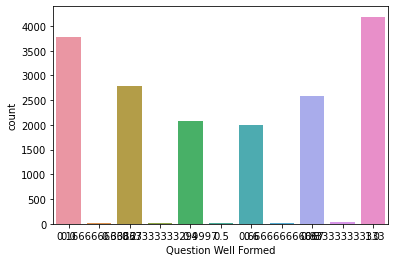

In [22]:
sns.countplot(df_train["labels"])
plt.xlabel('Question Well Formed');

In [23]:
df_val = pd.read_csv("./dev.tsv", delimiter="\t", header=None, index_col=False)
df_val["queries"] = df_val[0]
df_val["labels"] = df_val[1]

df_val = df_val.drop(columns=[0])
df_val = df_val.drop(columns=[1])
df_val.head()

,queries,labels
0,Who discovered x-rays in 1885 ?,1.0
1,How joseph nicephore came up with his invention ?,0.0
2,The female reproductive gland that matures the...,0.2
3,How doyou use ohms meter ?,0.0
4,Are there scene kids in denmark ?,1.0


In [24]:
df_test = pd.read_csv("./test.tsv", delimiter="\t", header=None, index_col=False)
df_test["queries"] = df_test[0]
df_test["labels"] = df_test[1]

df_test = df_test.drop(columns=[0])
df_test = df_test.drop(columns=[1])
df_test.head()

,queries,labels
0,Interesting facts about Egypt ?,0.4
1,What is thais in phuket famous for ?,0.0
2,What places have the oligarchy government ?,1.0
3,Where is the radiator fan relay located at 97 ...,0.4
4,When was the first helicopters built ?,0.4


### Choosing maximum token length

In [25]:
token_lens = []
for txt in df_train["queries"]:
  tokens = tokenizer.encode(txt, max_length=512)
  token_lens.append(len(tokens))

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


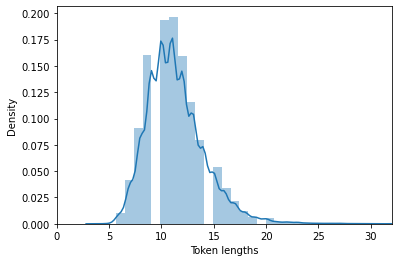

In [26]:
sns.distplot(token_lens)
plt.xlim([0, 32]);
plt.xlabel('Token lengths');

In [27]:
del token_lens

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


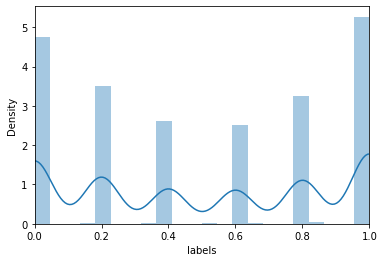

In [28]:
sns.distplot(df_train["labels"])
plt.xlim([0, 1]);



In [29]:
# count = 0
# classes = {'0.0','0.2','0.4', '0.6', '0.8', '1.0'}
# for j in range(len(df_train["labels"])):
#   if str(df_train["labels"][j]) not in classes:
#     count +=1
#     print(df_train["labels"][j], count)

### Dataset Class

In [30]:
class QueryDataset(Dataset):
    def __init__(self, queries, labels, tokenizer, max_len):
        super().__init__()

        self.queries = queries
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.labels)
    

    def __getitem__(self, idx):
        query = self.queries[idx]
        label = self.labels[idx]

        encoding = self.tokenizer.encode_plus(
            query,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            pad_to_max_length=True,
            return_attention_mask=True,
            return_tensors='pt',
        )

        return {
            'query_text': query,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'label': torch.tensor(label, dtype=torch.long)
        }

In [31]:
df_train.shape, df_val.shape

((17500, 2), (3750, 2))

In [32]:
def create_data_loader(df, tokenizer, max_len, batch_size):
    dataset = QueryDataset(
        queries=df["queries"].to_numpy(),
        labels=df["labels"].to_numpy(),
        tokenizer=tokenizer,
        max_len=max_len
    )
    return DataLoader(
        dataset,
        batch_size=batch_size
    )

In [33]:

train_data_loader = create_data_loader(df_train, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = create_data_loader(df_val, tokenizer, MAX_LEN, BATCH_SIZE)

### Sample data

In [34]:
data = next(iter(train_data_loader))
data.keys()

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2218: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


dict_keys(['query_text', 'input_ids', 'attention_mask', 'label'])

In [35]:
# model.config

In [36]:
class QueryClassifier(nn.Module):
    def __init__(self, n_classes):
        super().__init__()

        self.bert = bert_model
        self.drop = nn.Dropout(p=0.3)
        self.out = nn.Linear(self.bert.config.hidden_size, n_classes)
        
    def forward(self, input_ids, attention_mask):
        _, pooled_output = self.bert(
            input_ids=input_ids,
            # attention_mask=attention_mask.unsqueeze(0)
            attention_mask=attention_mask
        )
        output = self.drop(pooled_output)
        return self.out(output)

In [37]:

model = QueryClassifier(NUM_CLASSES)
model = model.to(device)

In [38]:
optimizer = AdamW(model.parameters(), lr=mylearn_rate, correct_bias=False)
total_steps = len(train_data_loader) * EPOCHS
scheduler = get_linear_schedule_with_warmup(
  optimizer,
  num_warmup_steps=0,
  num_training_steps=total_steps
)
loss_fn = nn.CrossEntropyLoss().to(device)

In [39]:
def train(model, data_loader, loss_fn, optimizer, device, scheduler, n_examples):
  model = model.train()
  losses = []
  correct_predictions = 0
  for index, batch in enumerate(data_loader):
    input_ids = batch["input_ids"].to(device)
    attention_mask = batch["attention_mask"].to(device)
    targets = batch["label"].to(device)

    # forward pass
    outputs = model(
      input_ids=input_ids,
      attention_mask=attention_mask
    )

    # loss
    loss = loss_fn(outputs, targets)

    # accuracy
    _, preds = torch.max(outputs, dim=1)
    correct_predictions += torch.sum(preds == targets)
    losses.append(loss.item())

    # backward pass
    loss.backward()
    nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

    # optimization
    optimizer.step()
    scheduler.step()
    optimizer.zero_grad()

    if index % 100 == 0:
        print(f"processed {index} batches")
  return correct_predictions.double() / n_examples, np.mean(losses)

In [40]:
def evaluation(model, data_loader, loss_fn, device, n_examples):
  model = model.eval()
  losses = []
  correct_predictions = 0
  with torch.no_grad():
    for batch in data_loader:
      input_ids = batch["input_ids"].to(device)
      attention_mask = batch["attention_mask"].to(device)
      targets = batch["label"].to(device)
      outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      _, preds = torch.max(outputs, dim=1)
      loss = loss_fn(outputs, targets)
      correct_predictions += torch.sum(preds == targets)
      losses.append(loss.item())
  return correct_predictions.double() / n_examples, np.mean(losses)

In [41]:
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [42]:
torch.cuda.empty_cache()

In [43]:
history = defaultdict(list)
best_valid_loss = float('inf')

for epoch in range(EPOCHS):
    start_time = time.time()

    train_acc, train_loss = train(model, train_data_loader, loss_fn, optimizer, device, scheduler, len(df_train))
    val_acc, val_loss = evaluation(model, val_data_loader, loss_fn, device, len(df_val))
    
    end_time = time.time()
    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    if val_loss < best_valid_loss:
        best_valid_loss = val_loss
        torch.save(model, "./model.pth")
    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {val_loss:.3f} |  Val. Acc: {val_acc*100:.2f}%')
    history['train_acc'].append(train_acc)
    history['train_loss'].append(train_loss)
    history['val_acc'].append(val_acc)
    history['val_loss'].append(val_loss)


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2218: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


processed 0 batches
processed 100 batches
processed 200 batches
processed 300 batches
processed 400 batches
processed 500 batches
Epoch: 01 | Epoch Time: 1m 17s
	Train Loss: 0.423 | Train Acc: 78.90%
	 Val. Loss: 0.366 |  Val. Acc: 82.05%
processed 0 batches
processed 100 batches
processed 200 batches
processed 300 batches
processed 400 batches
processed 500 batches
Epoch: 02 | Epoch Time: 1m 18s
	Train Loss: 0.241 | Train Acc: 89.74%
	 Val. Loss: 0.417 |  Val. Acc: 80.45%


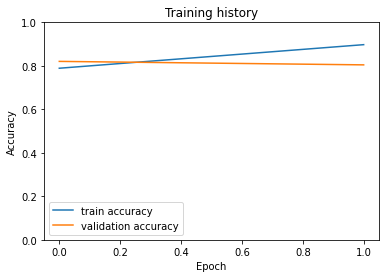

In [44]:
plt.plot(history['train_acc'], label='train accuracy')
plt.plot(history['val_acc'], label='validation accuracy')
plt.title('Training history')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.ylim([0, 1]);

In [45]:
model = torch.load("./model.pth")
test_data_loader = create_data_loader(df_test, tokenizer, MAX_LEN, BATCH_SIZE)
test_acc, test_loss = evaluation(model, test_data_loader, loss_fn, device, len(df_test))
print(f'\t Test. Loss: {test_loss:.3f} |  Test. Acc: {test_acc*100:.2f}%')

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2218: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


	 Test. Loss: 0.369 |  Test. Acc: 81.30%


In [46]:
def inference(query_text, model, device):
    encoded_query = tokenizer.encode_plus(
        query_text,
        max_length=MAX_LEN,
        add_special_tokens=True,
        return_token_type_ids=False,
        pad_to_max_length=True,
        return_attention_mask=True,
        return_tensors='pt',
    )

    input_ids = encoded_query['input_ids'].to(device)
    attention_mask = encoded_query['attention_mask'].to(device)
    output = model(input_ids, attention_mask)
    _, prediction = torch.max(output, dim=1)
    print(f'query text: {query_text}')
    print(f'label  : {prediction}')
    return prediction

In [47]:
test_query = "Do you hate this movie?"
inference(test_query, model, device)

query text: Do you hate this movie?
label  : tensor([1], device='cuda:0')


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2218: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


tensor([1], device='cuda:0')